* Introdaction ::
     * The Aim of Project :: The primary goal of that project go through data and exploratory_data to Analytic identify the Behaviour of that data to extract meaningfull knowlodege , insight and vision to get ability tomake more ffecient decision to imporove and enhance our Business
     * The data_set :: We have Frinds dataset which we gathering and collecting it from Freindly_App 
* Our Steps ::
     * Investigate data by doing cleansing data from Wrong data which its non logic_Values ,  Null data 
     * describe data
     * Visulaize data using data_visualization_elements like plots , charts and maps
* Techinical_Tools :: 
     * Numpy  :: For dealing with Vectors , Arrays and Matrix and To apply mathimatical_Operations
     * Pandas :: For Loading data and Exploratory data
     * Matplotlib,Seaborn For Visualizing data for identifing Trends , Outliers and Patterns of data
        

In [17]:
# Loading Liberaries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# To Make matplotlip support our Conda Version
%matplotlib inline
# To Set The Style of sns_plots
sns.set(rc = {"figure.figsize" : [10 , 10]} , font_scale=1.5)
sns.set_palette("viridis")

In [18]:
# Loading Data
df = pd.read_csv("friends.csv" , sep = "|")   # may seperator { \t , | , \n , or ,}


In [19]:
# Present head_Samples of data
df.head(5)

,fname,lname,age_sex,section,height(cm),weight(kg),age,spend_A,spend_B,spend_C
0,Rahul,Pandey,37_M,B,175.4,85.6,37,1500.0,200.0,300
1,Rakesh,Kumar,38_M,B,NaN,xx,38,NaN,1000.0,NaN
2,Nitesh,Mondol,35_F,B,165.1,?,35,500.0,-100.0,200
3,Arvind,Dwivedi,40_M,A,0,55.6,40,300.0,300.0,NaN
4,Nikhil,Shikharwar,39_M,B,160.8,160,39,200.0,NaN,300


In [20]:
# Present tail_Samples of data
df.tail(5)

,fname,lname,age_sex,section,height(cm),weight(kg),age,spend_A,spend_B,spend_C
5,Ashutosh,Merothiya,36_M,A,xx,-60,36,100.0,400.0,NaN
6,Shubhro,Das,35_F,C,170.3,75.5,35,NaN,500.0,500
7,Suvendu,Das,34_M,C,155.1,56.8,34,1000.0,100.0,xx
8,Swadesh,Kumar,36_M,C,154.2,60.6,36,100.0,200.0,300
9,Arun,Vishwakarma,38_F,A,162.1,58.7,38,600.0,200.0,200


* From The Resul above we can see some Observations ::
     * We have Age_sex Feature we can generate from that feature  Sex by doing Featuring Engineering Technice
     * We have height , wieght and  Spend A , B , C features include missing data like (Nan , xx , ?) on that case we will filling or impute that missing values Becouse we dont have large data 
     * We have Height ,  weight  and  Spend B include Wrong data Like(zero_height , negative values) onThat Case we will solve it 

In [21]:
# Present Columns of data
df.columns

Index(['fname', 'lname', 'age_sex', 'section', 'height(cm)', 'weight(kg)',
       'age', 'spend_A', 'spend_B', 'spend_C'],
      dtype='object')

In [22]:
# Present description of data
df.describe()

,age,spend_A,spend_B
count,10.000000,8.000000,9.000000
mean,36.800000,537.500000,311.111111
std,1.932184,492.624169,310.017921
min,34.000000,100.000000,-100.000000
25%,35.250000,175.000000,200.000000
50%,36.500000,400.000000,200.000000
75%,38.000000,700.000000,400.000000
max,40.000000,1500.000000,1000.000000


* From The result above we can see that There are columns not have discribtion But its Numerical data so That in that case we must identifing the Problem

In [23]:
# Present info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
fname         10 non-null object
lname         10 non-null object
age_sex       10 non-null object
section       10 non-null object
height(cm)    9 non-null object
weight(kg)    10 non-null object
age           10 non-null int64
spend_A       8 non-null float64
spend_B       9 non-null float64
spend_C       7 non-null object
dtypes: float64(2), int64(1), object(7)
memory usage: 928.0+ bytes


* From The Result above we can see some Observations ::
     * We have 10 Samples 
     * We have 10 Columns
     * Some columns Like (height , spend A , B , c) include Null Values
     * There are Columns as dtype Object instead of Numerical dtype that its the couse of they not dave description on That case we will converts its dtype into umerical
        

In [24]:
# generate sex from age_sexColumn That define data enginnering technice
df["sex"] = df["age_sex"].apply(lambda x : x.split("_")[1])

In [27]:
df[["sex"]]

,sex
0,M
1,M
2,F
3,M
4,M
5,M
6,F
7,M
8,M
9,F


# Cleancing dataset ::

In [25]:
# Convert dtypes of numerical features from Ojects dtype to Numerical_dtype

Numerical_features = ["height(cm)" , "weight(kg)" , "spend_C"]
for col in Numerical_features :
    df[col] = pd.to_numeric(df[col] , errors="coerce")

In [26]:
# Chech data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 11 columns):
fname         10 non-null object
lname         10 non-null object
age_sex       10 non-null object
section       10 non-null object
height(cm)    8 non-null float64
weight(kg)    8 non-null float64
age           10 non-null int64
spend_A       8 non-null float64
spend_B       9 non-null float64
spend_C       6 non-null float64
sex           10 non-null object
dtypes: float64(5), int64(1), object(5)
memory usage: 1008.0+ bytes


In [29]:
# Identyfing unqe and value count of feature for identifning wrong data which not logic data

for col in df.columns :
    print(f"The Col _{col}\n\nThe Uiqe_values of col_{col} :: {df[col].unique()}\n\nThe Value_Counts of col_{col} ::\n{df[col].value_counts()}")

The Col _fname

The Uiqe_values of col_fname :: ['Rahul' 'Rakesh' 'Nitesh' 'Arvind' 'Nikhil' 'Ashutosh' 'Shubhro'
 'Suvendu' 'Swadesh' 'Arun']

The Value_Counts of col_fname ::
Arun        1
Swadesh     1
Nikhil      1
Ashutosh    1
Rahul       1
Arvind      1
Shubhro     1
Suvendu     1
Rakesh      1
Nitesh      1
Name: fname, dtype: int64
The Col _lname

The Uiqe_values of col_lname :: ['Pandey' 'Kumar' 'Mondol' 'Dwivedi' 'Shikharwar' 'Merothiya' 'Das'
 'Vishwakarma']

The Value_Counts of col_lname ::
Kumar          2
Das            2
Mondol         1
Dwivedi        1
Merothiya      1
Vishwakarma    1
Shikharwar     1
Pandey         1
Name: lname, dtype: int64
The Col _age_sex

The Uiqe_values of col_age_sex :: ['37_M' '38_M' '35_F' '40_M' '39_M' '36_M' '34_M' '38_F']

The Value_Counts of col_age_sex ::
36_M    2
35_F    2
34_M    1
39_M    1
37_M    1
38_M    1
40_M    1
38_F    1
Name: age_sex, dtype: int64
The Col _section

The Uiqe_values of col_section :: ['B' 'A' 'C']

The Valu

* From The result above we can see some Observations ::
     * The Weight and Spend_B columns include wrong values which it negative and that no logic to find that values negative so tyhat on that case we will convert them unto positive values.
     * The height column include wrong values also which it equale zero and that no logic to find values of height eaqule zero
     * There are columns of data iclude nan values which it is miissing we will on that case fill data becouse we dont have large data to drop them
     * There are columns include diff missing data valuse we must fill them

In [30]:
# Solve Negative data Issuse
df["weight(kg)"] = df["weight(kg)"].apply(lambda x : abs(x))
df["spend_B"]    = df["spend_B"].apply(lambda x : abs(x))

In [31]:
# cheching data
for col in ["weight(kg)" , "spend_B"] :
    print(f"{df[col].unique()}\n=====\n")

[ 85.6   nan  55.6 160.   60.   75.5  56.8  60.6  58.7]
=====

[ 200. 1000.  100.  300.   nan  400.  500.]
=====



In [32]:
# Solving Zero Values in data 
df.loc[df["height(cm)"] == 0.0 , "height(cm)"] = df["height(cm)"].median()

# Other Silution
#df["height(cm)"] = df["height(cm)"].apply(lambda x : df["height(cm)"].median() if x == 0.0 else x)

In [33]:
# Cheching solving poroblem
df["height(cm)"].value_counts()

155.10    1
175.40    1
165.10    1
154.20    1
160.80    1
161.45    1
162.10    1
170.30    1
Name: height(cm), dtype: int64

In [34]:
df.head(5)

,fname,lname,age_sex,section,height(cm),weight(kg),age,spend_A,spend_B,spend_C,sex
0,Rahul,Pandey,37_M,B,175.40,85.6,37,1500.0,200.0,300.0,M
1,Rakesh,Kumar,38_M,B,NaN,NaN,38,NaN,1000.0,NaN,M
2,Nitesh,Mondol,35_F,B,165.10,NaN,35,500.0,100.0,200.0,F
3,Arvind,Dwivedi,40_M,A,161.45,55.6,40,300.0,300.0,NaN,M
4,Nikhil,Shikharwar,39_M,B,160.80,160.0,39,200.0,NaN,300.0,M


In [35]:
# Solving Missind data values on that data we will fill data But sometimes we cann't fill it becouse may Txt data include missin

Cols_include_NAN = df.iloc[ : , 4 : -1]
Cols_include_NAN

,height(cm),weight(kg),age,spend_A,spend_B,spend_C
0,175.40,85.6,37,1500.0,200.0,300.0
1,NaN,NaN,38,NaN,1000.0,NaN
2,165.10,NaN,35,500.0,100.0,200.0
3,161.45,55.6,40,300.0,300.0,NaN
4,160.80,160.0,39,200.0,NaN,300.0
5,NaN,60.0,36,100.0,400.0,NaN
6,170.30,75.5,35,NaN,500.0,500.0
7,155.10,56.8,34,1000.0,100.0,NaN
8,154.20,60.6,36,100.0,200.0,300.0
9,162.10,58.7,38,600.0,200.0,200.0


In [36]:
for col in Cols_include_NAN :
    df[col].fillna(df[col].median() , inplace= True)

# Investigation data

In [37]:
df

,fname,lname,age_sex,section,height(cm),weight(kg),age,spend_A,spend_B,spend_C,sex
0,Rahul,Pandey,37_M,B,175.400,85.6,37,1500.0,200.0,300.0,M
1,Rakesh,Kumar,38_M,B,161.775,60.3,38,400.0,1000.0,300.0,M
2,Nitesh,Mondol,35_F,B,165.100,60.3,35,500.0,100.0,200.0,F
3,Arvind,Dwivedi,40_M,A,161.450,55.6,40,300.0,300.0,300.0,M
4,Nikhil,Shikharwar,39_M,B,160.800,160.0,39,200.0,200.0,300.0,M
5,Ashutosh,Merothiya,36_M,A,161.775,60.0,36,100.0,400.0,300.0,M
6,Shubhro,Das,35_F,C,170.300,75.5,35,400.0,500.0,500.0,F
7,Suvendu,Das,34_M,C,155.100,56.8,34,1000.0,100.0,300.0,M
8,Swadesh,Kumar,36_M,C,154.200,60.6,36,100.0,200.0,300.0,M
9,Arun,Vishwakarma,38_F,A,162.100,58.7,38,600.0,200.0,200.0,F


In [38]:
df.describe()

,height(cm),weight(kg),age,spend_A,spend_B,spend_C
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,162.800000,73.340000,36.800000,510.000000,320.000000,300.000000
std,6.341782,31.881524,1.932184,438.304815,269.979423,81.649658
min,154.200000,55.600000,34.000000,100.000000,100.000000,200.000000
25%,160.962500,59.025000,35.250000,225.000000,200.000000,300.000000
50%,161.775000,60.300000,36.500000,400.000000,200.000000,300.000000
75%,164.350000,71.775000,38.000000,575.000000,375.000000,300.000000
max,175.400000,160.000000,40.000000,1500.000000,1000.000000,500.000000


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 11 columns):
fname         10 non-null object
lname         10 non-null object
age_sex       10 non-null object
section       10 non-null object
height(cm)    10 non-null float64
weight(kg)    10 non-null float64
age           10 non-null int64
spend_A       10 non-null float64
spend_B       10 non-null float64
spend_C       10 non-null float64
sex           10 non-null object
dtypes: float64(5), int64(1), object(5)
memory usage: 1008.0+ bytes


* From The result above we can see that data without any describencies , wrong and null values That mean we can Visualize That data To Identify Trends , outliers and paternes of that data And Extract MeaningFull Knowledge , insights and Vision From that data to make Efficient decision to improve and enhance our Business

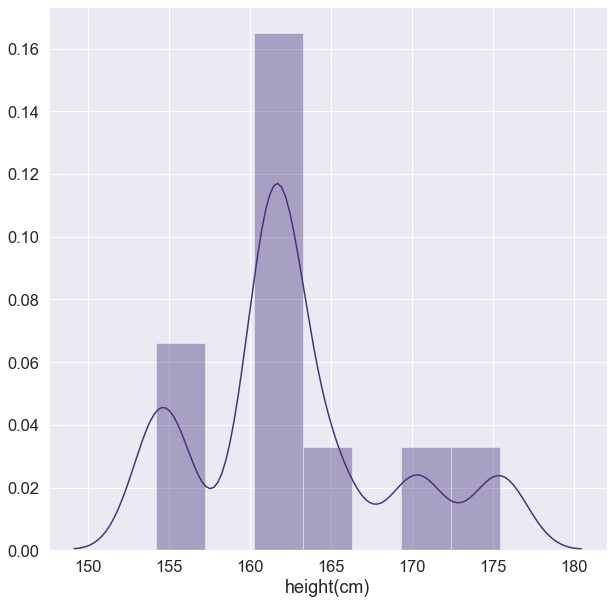

In [40]:
sns.distplot( df["height(cm)"]  )

* From that plot we can see that the most distribution of height in the range from 160 to 162.5

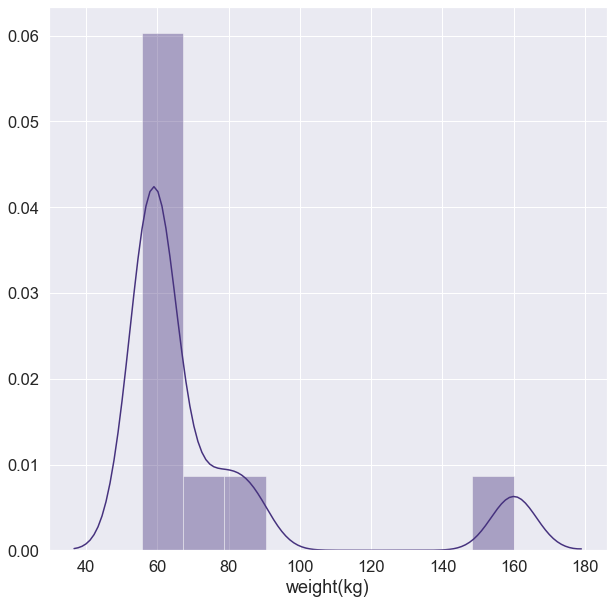

In [41]:
sns.distplot( df["weight(kg)"]  )

* From that plot we can see that the most distribution of weight in the range from 58 to 65

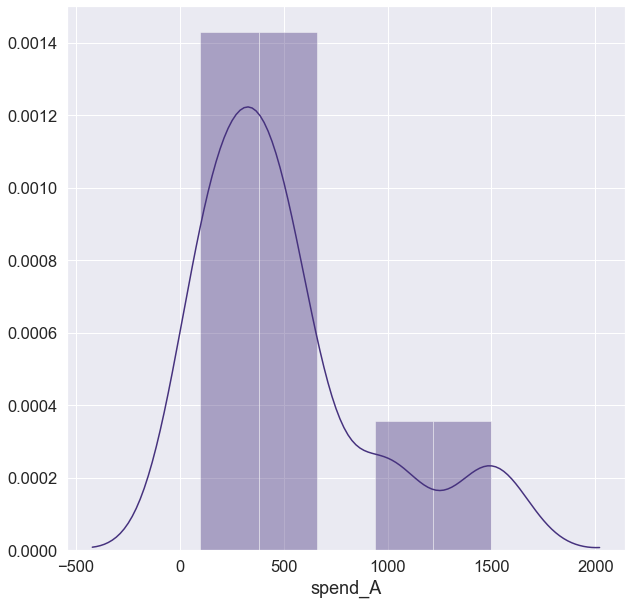

In [42]:
sns.distplot( df["spend_A"]  )

* From that plot we can see that the most distribution of Spend_A in the range from 100 to 700

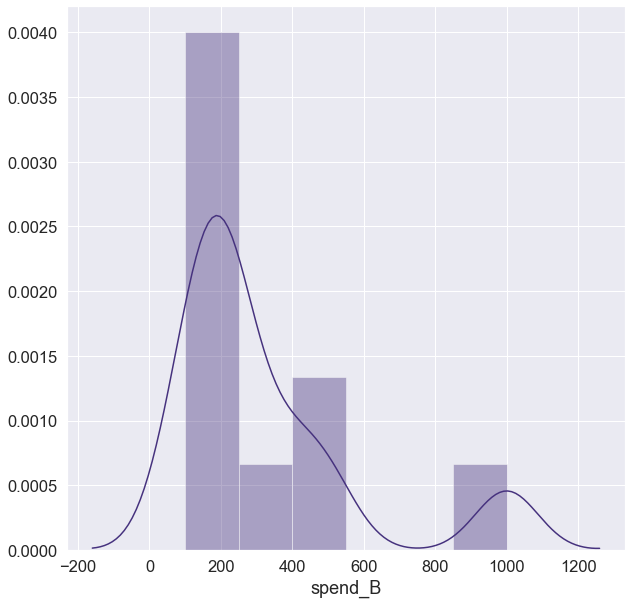

In [43]:
sns.distplot( df["spend_B"]  )

* From that plot we can see that the most distribution of Spend_B in the range from 100 to 250

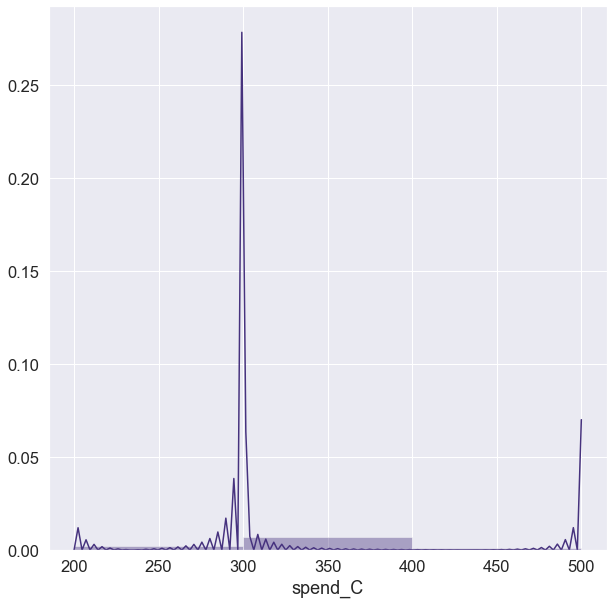

In [44]:
sns.distplot( df["spend_C"]  )

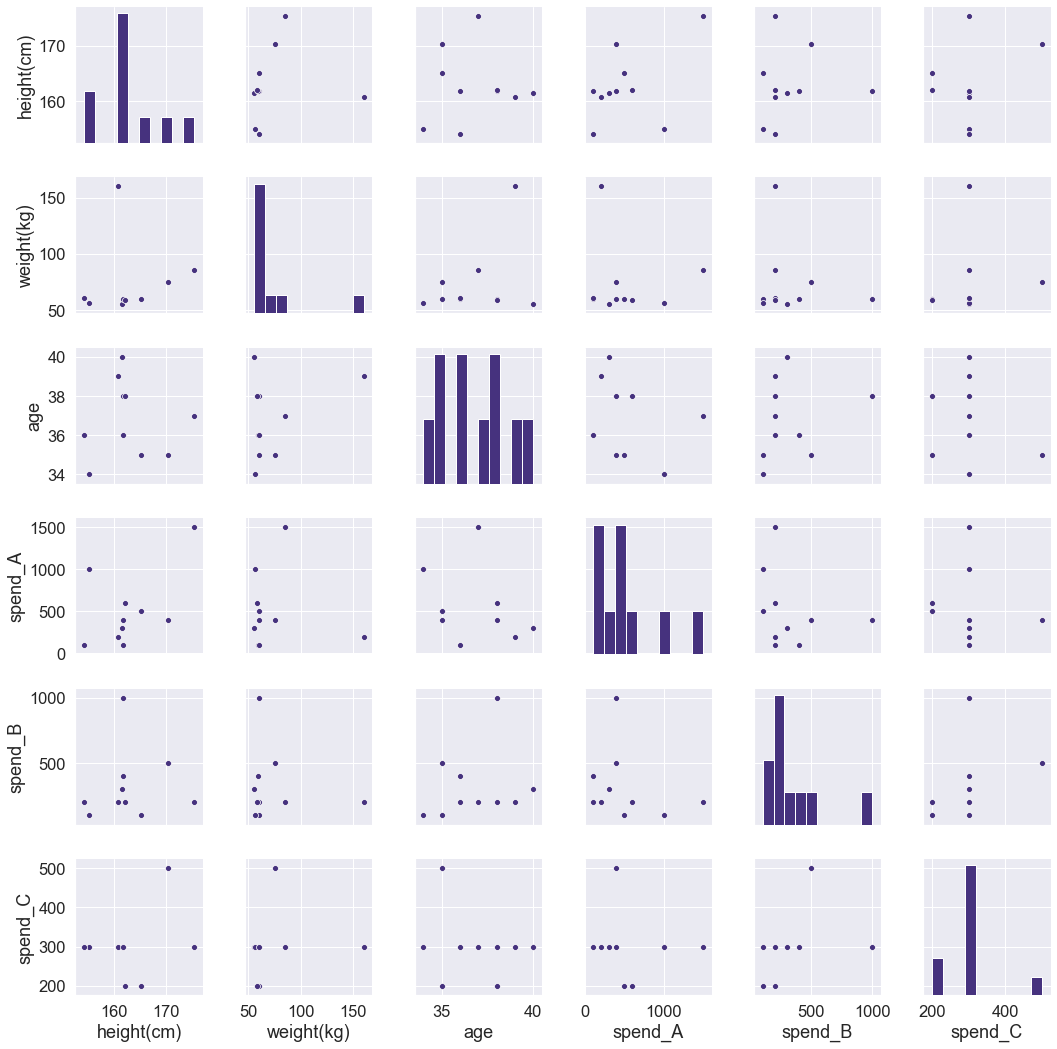

In [45]:
sns.pairplot(df)

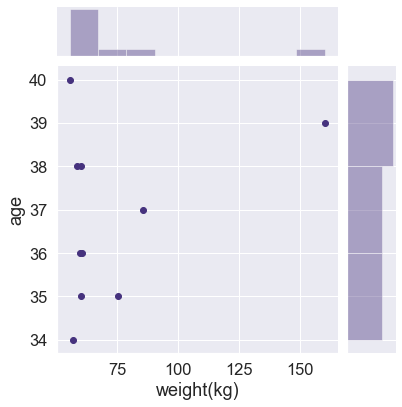

In [46]:
sns.jointplot( x = "weight(kg)" , y = "age" ,data = df , kind="scatter")

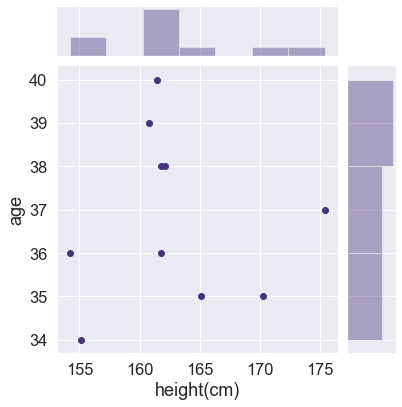

In [48]:
sns.jointplot( x = "height(cm)" , y = "age" ,data = df , kind="scatter")

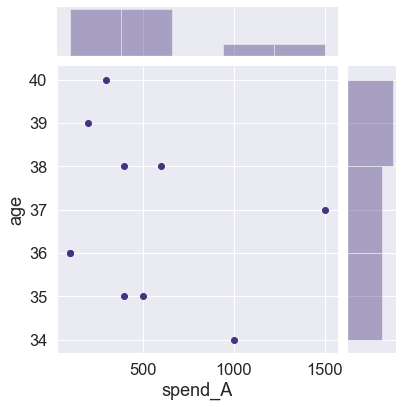

In [49]:
sns.jointplot( x = "spend_A" , y = "age" ,data = df , kind="scatter")

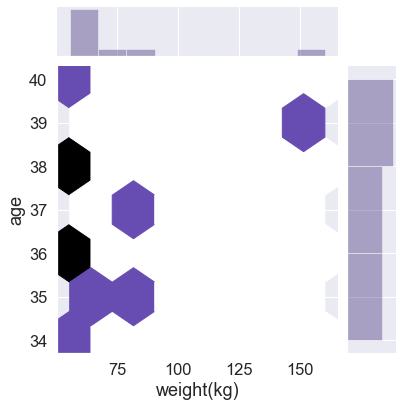

In [50]:
sns.jointplot( x = "weight(kg)" , y = "age" ,data = df , kind="hex")

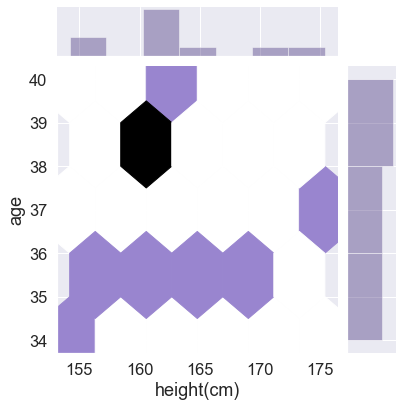

In [51]:
sns.jointplot( x = "height(cm)" , y = "age" ,data = df , kind="hex")

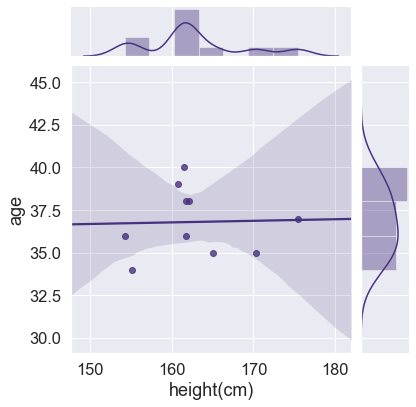

In [52]:
sns.jointplot( x = "height(cm)" , y = "age" ,data = df , kind="reg")

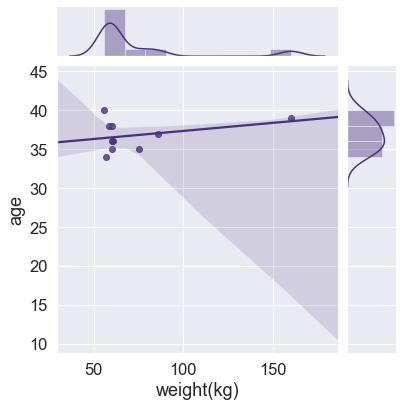

In [54]:
sns.jointplot( x = "weight(kg)" , y = "age" ,data = df , kind="reg")

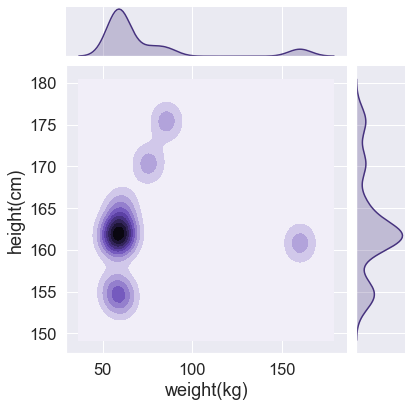

In [55]:
sns.jointplot( x = "weight(kg)" , y = "height(cm)" ,data = df , kind="kde" )

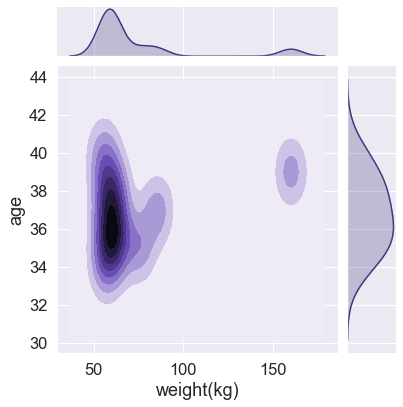

In [56]:
sns.jointplot( x = "weight(kg)" , y = "age" ,data = df , kind="kde" )

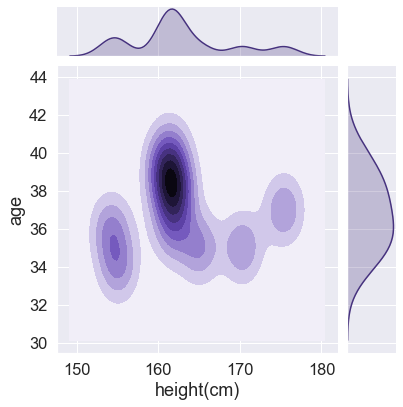

In [57]:
sns.jointplot( x = "height(cm)" , y = "age" ,data = df , kind="kde" )

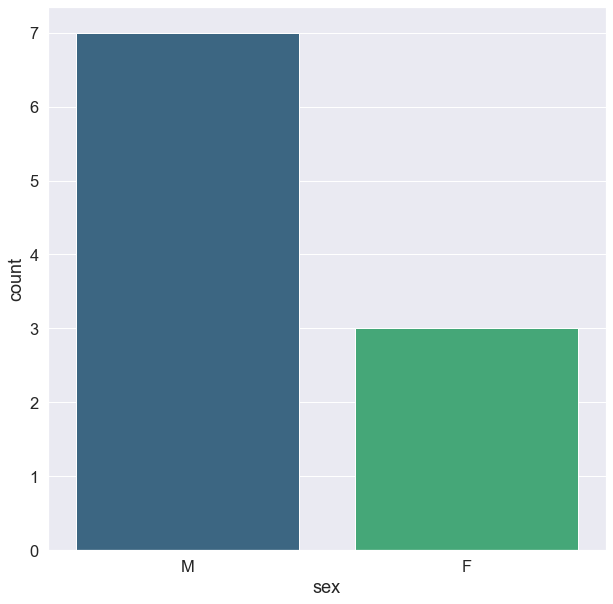

In [59]:
sns.countplot( x = "sex" , data = df , palette="viridis")

* From The result above Numbers of Male is More larger Than Num Of Female

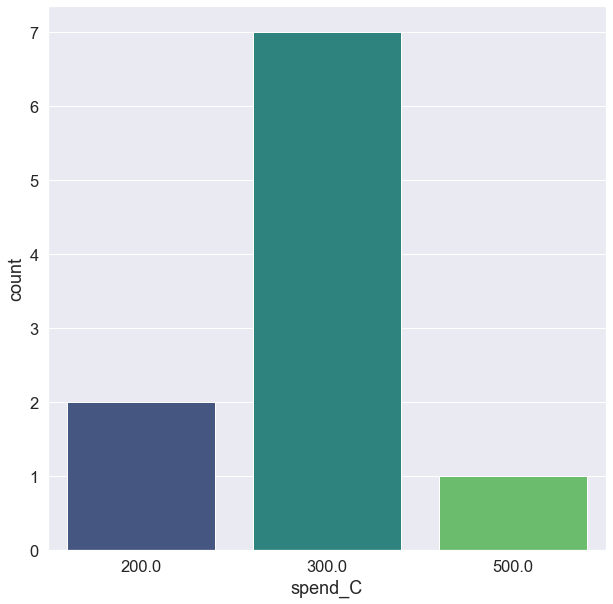

In [61]:
sns.countplot( x = "spend_C" , data = df , palette="viridis" )

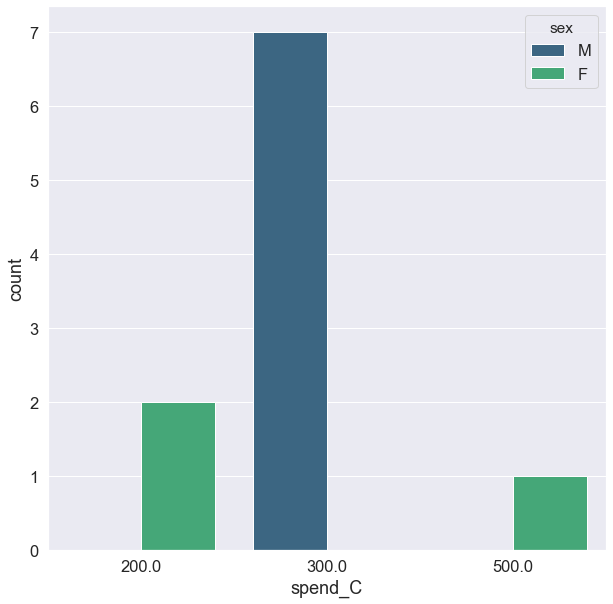

In [62]:
sns.countplot( x = "spend_C" , data = df , palette="viridis" , hue="sex")

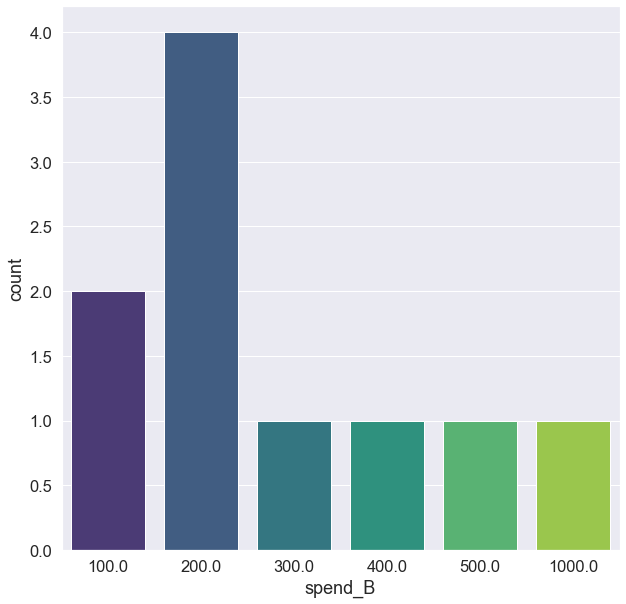

In [63]:
sns.countplot( x = "spend_B" , data = df , palette="viridis" )

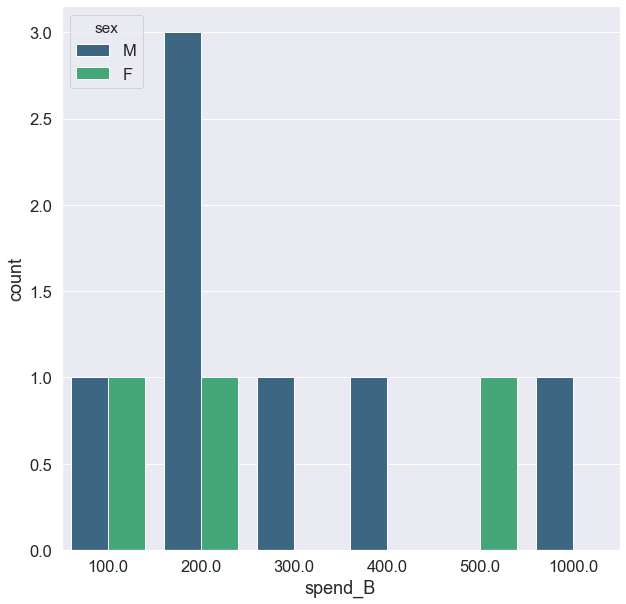

In [65]:
sns.countplot( x = "spend_B" , data = df , palette="viridis" , hue="sex")

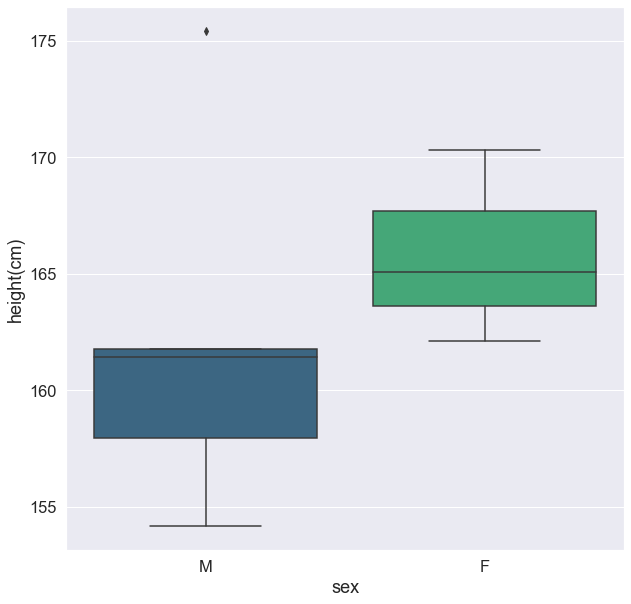

In [79]:
sns.boxplot( x = "sex" , y = "height(cm)" , data = df , palette  = "viridis")

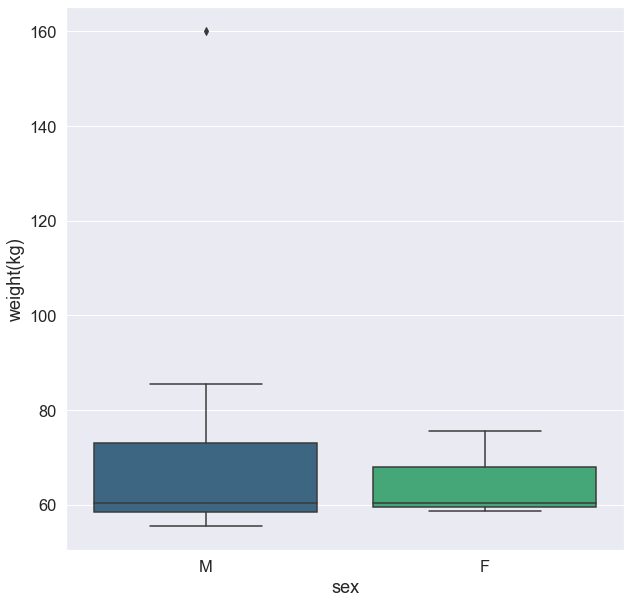

In [78]:
sns.boxplot( x = "sex" , y = "weight(kg)" , data = df , palette  = "viridis")

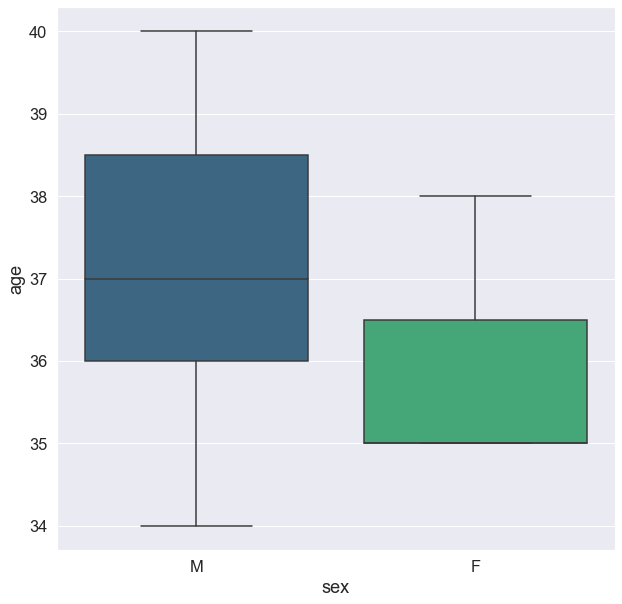

In [77]:
sns.boxplot( x = "sex" , y = "age" , data = df , palette  = "viridis")

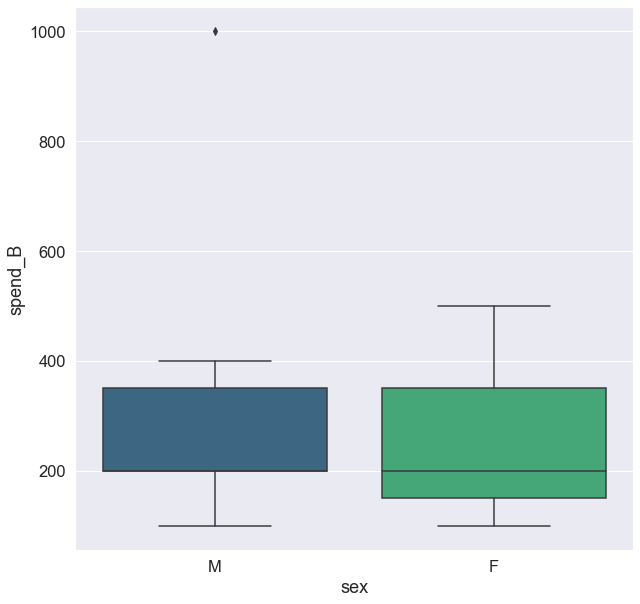

In [76]:
sns.boxplot( x = "sex" , y = "spend_B" , data = df , palette  = "viridis")

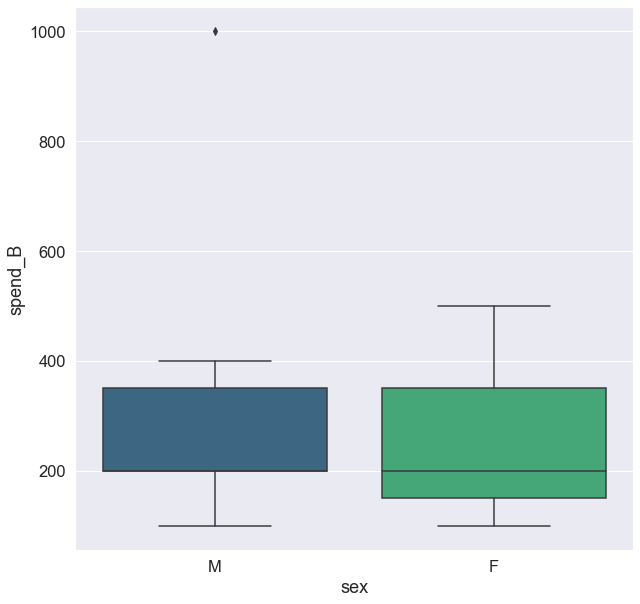

In [75]:
sns.boxplot( x = "sex" , y = "spend_B" , data = df , palette  = "viridis")

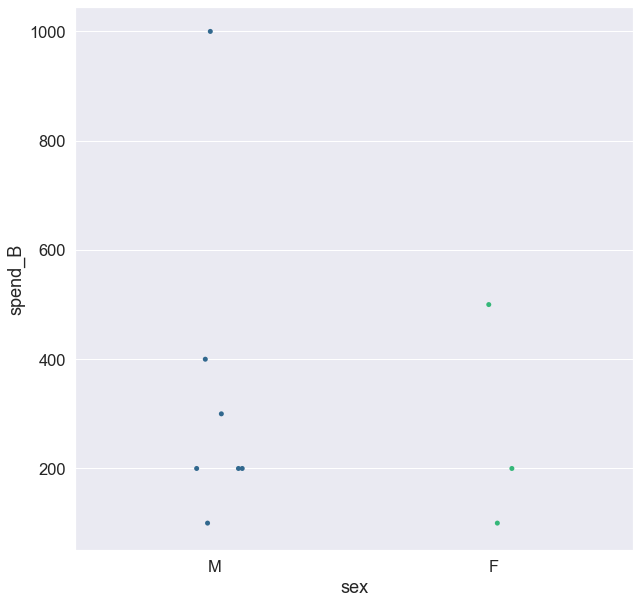

In [74]:
sns.stripplot( x = "sex" , y = "spend_B" , data = df , palette  = "viridis")

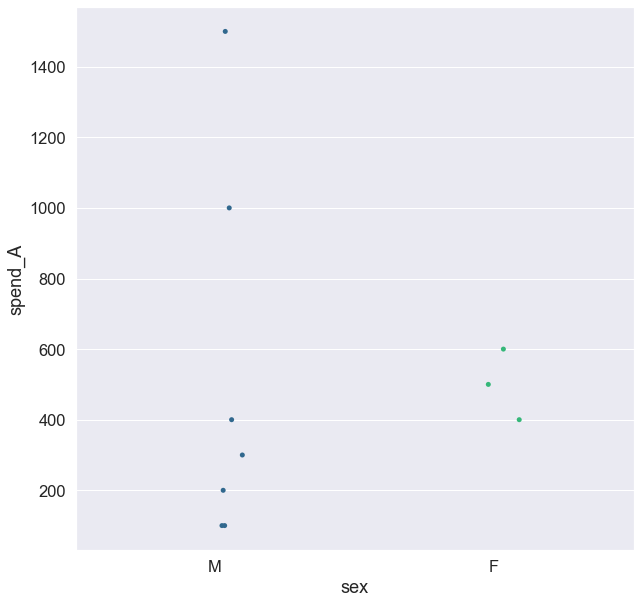

In [80]:
sns.stripplot( x = "sex" , y = "spend_A" , data = df , palette  = "viridis")

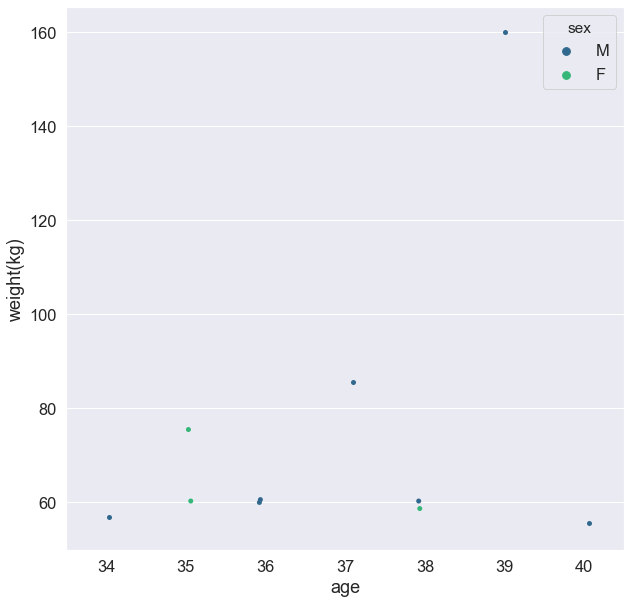

In [83]:
sns.stripplot( x = "age" , y = "weight(kg)" , hue="sex" , data = df , palette  = "viridis")

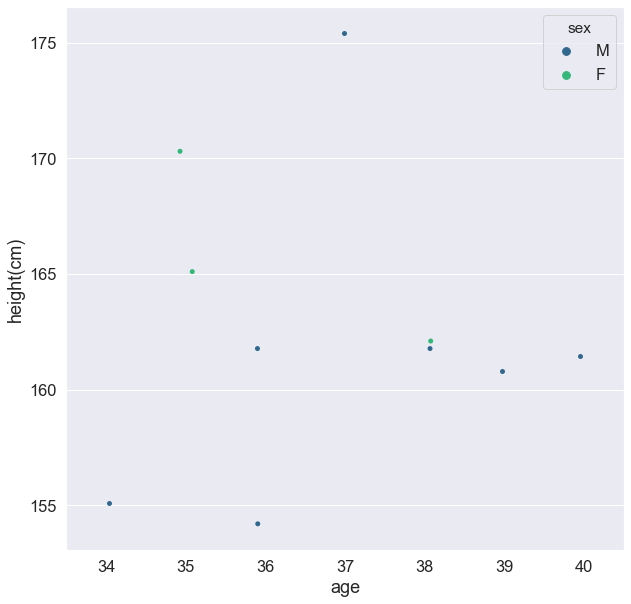

In [84]:
sns.stripplot( x = "age" , y = "height(cm)" , hue="sex" , data = df , palette  = "viridis")

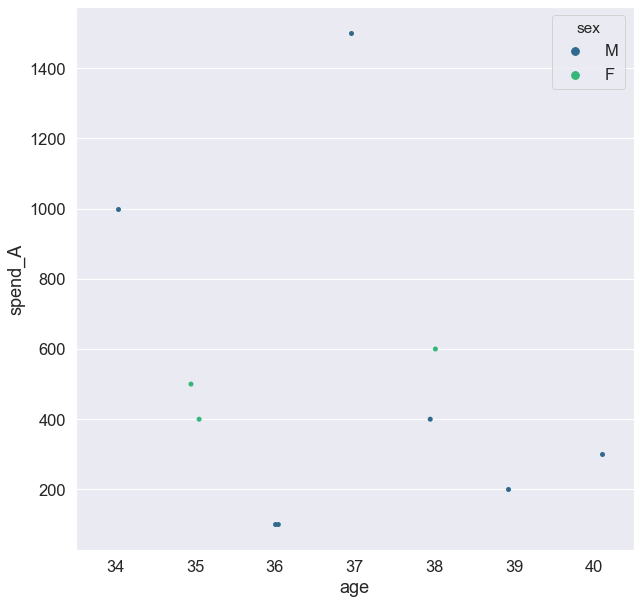

In [85]:
sns.stripplot( x = "age" , y = "spend_A" , hue="sex" , data = df , palette  = "viridis")